In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder, playbyplay, winprobabilitypbp
from nba_api.stats.library.parameters import Season, SeasonType

In [2]:
df_2122 = pd.read_csv("choke_list_2122.csv")
df_2021 = pd.read_csv("choke_list_2021.csv")
df_1920 = pd.read_csv("choke_list_1920.csv")

In [3]:
df = df_2122.append(df_2021)
df = df.append(df_1920).reset_index()
df.head()

,index,game_id,season,home_team,away_team,home_choke
0,0,22100137,2021-22,PHX,ATL,0.0
1,1,22100190,2021-22,CLE,BOS,0.0
2,2,22100098,2021-22,BOS,CHI,1.0
3,3,22100041,2021-22,CHA,BOS,1.0
4,4,22100253,2021-22,CLE,BKN,1.0


In [4]:
df.shape[0]

240

In [5]:
df2 = pd.DataFrame({"team": np.unique(df["home_team"].append(df["away_team"])), "chokes": np.zeros(30), "comebacks": np.zeros(30)}).set_index("team")
df2.loc["PHX", "chokes"]

0.0

In [6]:
for i in range(df.shape[0]):
    row = df.loc[i]
    if row.home_choke == 1.0:
        df2.loc[row.home_team, "chokes"] += 1
        df2.loc[row.away_team, "comebacks"] += 1
    else:
        df2.loc[row.home_team, "comebacks"] += 1
        df2.loc[row.away_team, "chokes"] += 1
df2 = df2.reset_index()

In [7]:
df2

,team,chokes,comebacks
0,ATL,5.0,11.0
1,BKN,7.0,10.0
2,BOS,8.0,9.0
3,CHA,11.0,11.0
4,CHI,9.0,7.0
5,CLE,9.0,7.0
6,DAL,8.0,6.0
7,DEN,8.0,17.0
8,DET,8.0,3.0
9,GSW,5.0,9.0


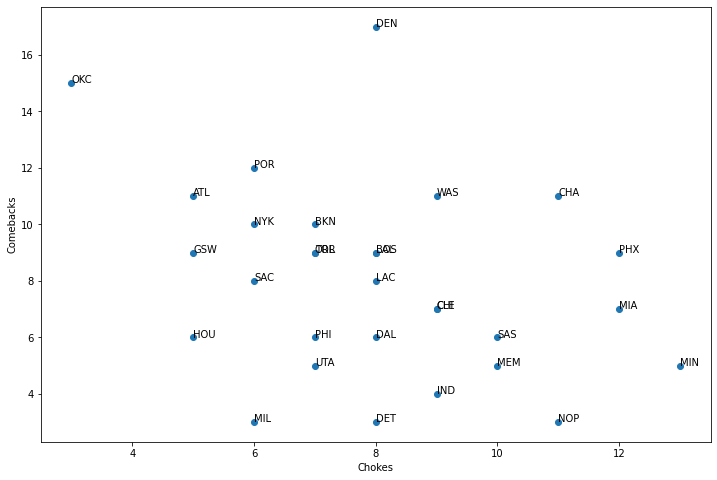

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(df2.chokes, df2.comebacks)
for idx, row in df2.iterrows():
    plt.annotate(row.team, (row.chokes, row.comebacks))
plt.xlabel("Chokes")
plt.ylabel("Comebacks")
plt.show()

In [11]:
all_chokes = pd.read_csv('choke_list_tot.csv').drop(columns = ["index"])

In [16]:
all_chokes

,game_id,season,home_team,away_team,home_choke
0,21900837,2019-20,ATL,DAL,0.0
1,21900656,2019-20,ATL,LAC,0.0
2,21900624,2019-20,SAS,ATL,1.0
3,21900491,2019-20,ORL,ATL,1.0
4,21900431,2019-20,BKN,ATL,0.0
...,...,...,...,...,...
343,41700133,2017-18,IND,CLE,0.0
344,41700317,2017-18,HOU,GSW,1.0
345,41700314,2017-18,GSW,HOU,1.0
346,41700124,2017-18,MIA,PHI,1.0


In [40]:
pbp = playbyplay.PlayByPlay(game_id=str('0021900656')).get_data_frames()[0]
wp = winprobabilitypbp.WinProbabilityPBP(game_id='00'+ str(all_chokes.loc[1, 'game_id'])).get_data_frames()[0].dropna(subset=['EVENT_NUM'])

In [45]:
wp.to_excel('choke_test.xlsx')

<AxesSubplot:>

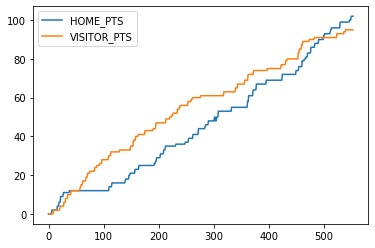

In [46]:
wp.reset_index(inplace=True)
wp[['HOME_PTS', 'VISITOR_PTS']].plot()

<AxesSubplot:>

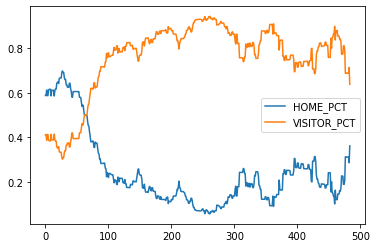

In [47]:
wp[['HOME_PCT', 'VISITOR_PCT']].plot()

In [51]:
test = ep.boxscoreadvancedv2.BoxScoreAdvancedV2(game_id='00'+ str(all_chokes.loc[1, 'game_id']))

In [50]:
import nba_api.stats.endpoints as ep
??ep.boxscoreadvancedv2

Type:        module
String form: <module 'nba_api.stats.endpoints.boxscoreadvancedv2' from '/Users/blake_hartung/opt/anaconda3/envs/projects/lib/python3.8/site-packages/nba_api/stats/endpoints/boxscoreadvancedv2.py'>
File:        ~/opt/anaconda3/envs/projects/lib/python3.8/site-packages/nba_api/stats/endpoints/boxscoreadvancedv2.py
Source:     
from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.library.parameters import EndPeriod, EndRange, RangeType, StartPeriod, StartRange


class BoxScoreAdvancedV2(Endpoint):
    endpoint = 'boxscoreadvancedv2'
    expected_data = {'PlayerStats': ['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'E_USG_PCT',

In [54]:
test.get_data_frames()[0].to_excel('box_score_sample.xlsx')

In [57]:
test.get_data_frames()[0]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0021900656,1610612746,LAC,LA,1629013,Landry Shamet,Landry,F,,36:09,...,7.7,0.500,0.553,0.163,0.163,100.78,100.25,83.54,75,0.062
1,0021900656,1610612746,LAC,LA,203090,Maurice Harkless,Maurice,F,,27:10,...,44.4,0.667,0.773,0.129,0.129,102.70,101.57,84.64,58,0.061
2,0021900656,1610612746,LAC,LA,1627826,Ivica Zubac,Ivica,C,,15:18,...,0.0,0.833,0.799,0.206,0.210,98.51,98.82,82.35,32,0.337
3,0021900656,1610612746,LAC,LA,101150,Lou Williams,Lou,G,,34:32,...,9.7,0.316,0.416,0.320,0.319,99.33,98.69,82.24,71,0.140
4,0021900656,1610612746,LAC,LA,1629611,Terance Mann,Terance,G,,15:23,...,20.0,0.000,0.266,0.079,0.081,106.15,107.65,89.71,34,-0.019
5,0021900656,1610612746,LAC,LA,203585,Rodney McGruder,Rodney,,,23:53,...,0.0,0.286,0.363,0.158,0.159,104.56,100.46,83.72,51,0.068
6,0021900656,1610612746,LAC,LA,1626149,Montrezl Harrell,Montrezl,,,32:42,...,12.1,0.522,0.522,0.429,0.435,104.57,102.02,85.02,69,0.164
7,0021900656,1610612746,LAC,LA,1629010,Jerome Robinson,Jerome,,,19:22,...,10.0,0.300,0.300,0.128,0.136,106.03,102.86,85.71,41,0.085
8,0021900656,1610612746,LAC,LA,203210,JaMychal Green,JaMychal,,,22:07,...,0.0,0.500,0.500,0.059,0.060,100.95,97.69,81.41,44,0.047
9,0021900656,1610612746,LAC,LA,1628476,Derrick Walton Jr.,Derrick,,,6:53,...,0.0,0.000,0.568,0.053,0.059,109.06,104.60,87.17,15,0.071


In [88]:
win_df = winprobabilitypbp.WinProbabilityPBP(game_id='00'+ str(all_chokes.loc[1, 'game_id'])).get_data_frames()[0]
pbp_df = playbyplay.PlayByPlay(game_id=str('0021900656')).get_data_frames()[0]
pbp_df['EVENT_NUM'] = pd.to_numeric(pbp_df.EVENTNUM)
pbp_df = pbp_df.dropna(subset=['EVENT_NUM']).set_index('EVENT_NUM')
joined = pbp_df.merge(win_df)
joined2 = joined[['GAME_ID', 'PERIOD', 'HOME_PTS', 'VISITOR_PTS', 'HOMEDESCRIPTION',
                  'NEUTRALDESCRIPTION', 'VISITORDESCRIPTION', 'HOME_PCT', 'VISITOR_PCT',
                  'PCTIMESTRING']]
joined3 = joined2.drop_duplicates(subset=['HOMEDESCRIPTION','VISITORDESCRIPTION', 'NEUTRALDESCRIPTION']).reset_index(drop=True).reset_index()
joined3

,index,GAME_ID,PERIOD,HOME_PTS,VISITOR_PTS,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,HOME_PCT,VISITOR_PCT,PCTIMESTRING
0,0,0021900656,1,0,0,None,Start of 1st Period (7:40 PM EST),None,0.58808,0.41192,12:00
1,1,0021900656,1,0,0,Jump Ball Fernando vs. Zubac: Tip to Harkless,None,None,0.58808,0.41192,12:00
2,2,0021900656,1,0,0,Fernando STEAL (1 STL),None,Shamet Lost Ball Turnover (P1.T1),0.61316,0.38684,11:43
3,3,0021900656,1,0,0,Huerter Bad Pass Turnover (P1.T1),None,None,0.58762,0.41238,11:39
4,4,0021900656,1,0,0,None,None,MISS Williams 3PT Jump Shot,0.58735,0.41265,11:27
...,...,...,...,...,...,...,...,...,...,...,...
483,483,0021900656,4,100,95,Huerter REBOUND (Off:1 Def:6),None,None,NaN,NaN,0:27
484,484,0021900656,4,102,95,Goodwin 14' Driving Finger Roll Layup (19 PTS),None,None,NaN,NaN,0:15
485,485,0021900656,4,102,95,None,None,MISS Williams 26' 3PT Jump Shot,NaN,NaN,0:09
486,486,0021900656,4,102,95,Reddish REBOUND (Off:1 Def:7),None,None,NaN,NaN,0:04


In [63]:
joined3.loc[joined3.HOME_PCT == joined3.HOME_PCT.min()]

,GAME_ID,PERIOD,HOME_PTS,VISITOR_PTS,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,HOME_PCT,VISITOR_PCT,PCTIMESTRING
237,0021900656,2,37,58,None,None,Harrell 8' Driving Hook Shot (21 PTS),0.05637,0.94363,0:57


In [65]:

joined3.to_excel('final_df.xlsx')

In [84]:
# joined3['home_short'] = np.select(
#     [
#         'Rebound' in joined3['HOMEDESCRIPTION'],
#         'Layup' in joined3['HOMEDESCRIPTION'],
#         'MISS' in joined3['HOMEDESCRIPTION'],
#         'foul' in joined3['HOMEDESCRIPTION'],
#     ],
#     [
#         'Rebound',
#         'Layup',
#         'MISS',
#         'foul'
#     ],
#     default='unknown')

joined3['home_short']= ''
joined3['visitor_short'] = ''

for i in joined3.index:
    home_desc = joined3.loc[i, "HOMEDESCRIPTION"]
    visitor_desc = joined3.loc[i, "VISITORDESCRIPTION"]
    
    if home_desc !=None and "miss" in home_desc.strip().lower():
        joined3.at[i, 'home_short'] = "miss"
    
    if home_desc != None and 'steal' in home_desc.strip().lower():
        joined3.at[i, 'home_short'] = "steal"
    
    if home_desc != None and 'rebound' in home_desc.strip().lower():
        joined3.at[i, 'home_short'] = "rebound"
    
    if home_desc != None and 'sub' in home_desc.strip().lower():
        joined3.at[i, 'home_short'] = "sub"
        
    if home_desc != None and 'block' in home_desc.strip().lower():
        joined3.at[i, 'home_short'] = "block"
    
    if visitor_desc !=None and "miss" in visitor_desc.strip().lower():
        joined3.at[i, 'visitor_short'] = "miss"
    
    if visitor_desc != None and 'steal' in visitor_desc.strip().lower():
        joined3.at[i, 'visitor_short'] = "steal"
    
    if visitor_desc != None and 'rebound' in visitor_desc.strip().lower():
        joined3.at[i, 'visitor_short'] = "rebound"
    
    if visitor_desc != None and 'sub' in visitor_desc.strip().lower():
        joined3.at[i, 'visitor_short'] = "sub"
    
    if visitor_desc != None and 'block' in visitor_desc.strip().lower():
        joined3.at[i, 'visitor_short'] = "block"
    
    
    


    

        
        
    
        

In [86]:
joined3.to_excel("with_description.xlsx")

In [87]:
joined3.columns

Index(['GAME_ID', 'PERIOD', 'HOME_PTS', 'VISITOR_PTS', 'HOMEDESCRIPTION',
       'NEUTRALDESCRIPTION', 'VISITORDESCRIPTION', 'HOME_PCT', 'VISITOR_PCT',
       'PCTIMESTRING', 'home_short', 'visitor_short'],
      dtype='object')